## Audio and Music Processing Lab - Module 2
### Final assignment: Melodic aspect of Arab Andalusian Music
Abhishek, Francesco, Tomasso

RQ: melodic similarities and pattern recognition in different Nawbas.
Find similarity patterns between the instrumental preludes, between the sung poems and in themselves.

In [1]:
import music21
from music21 import *

from music21 import analysis


<class 'music21.stream.base.Score'>


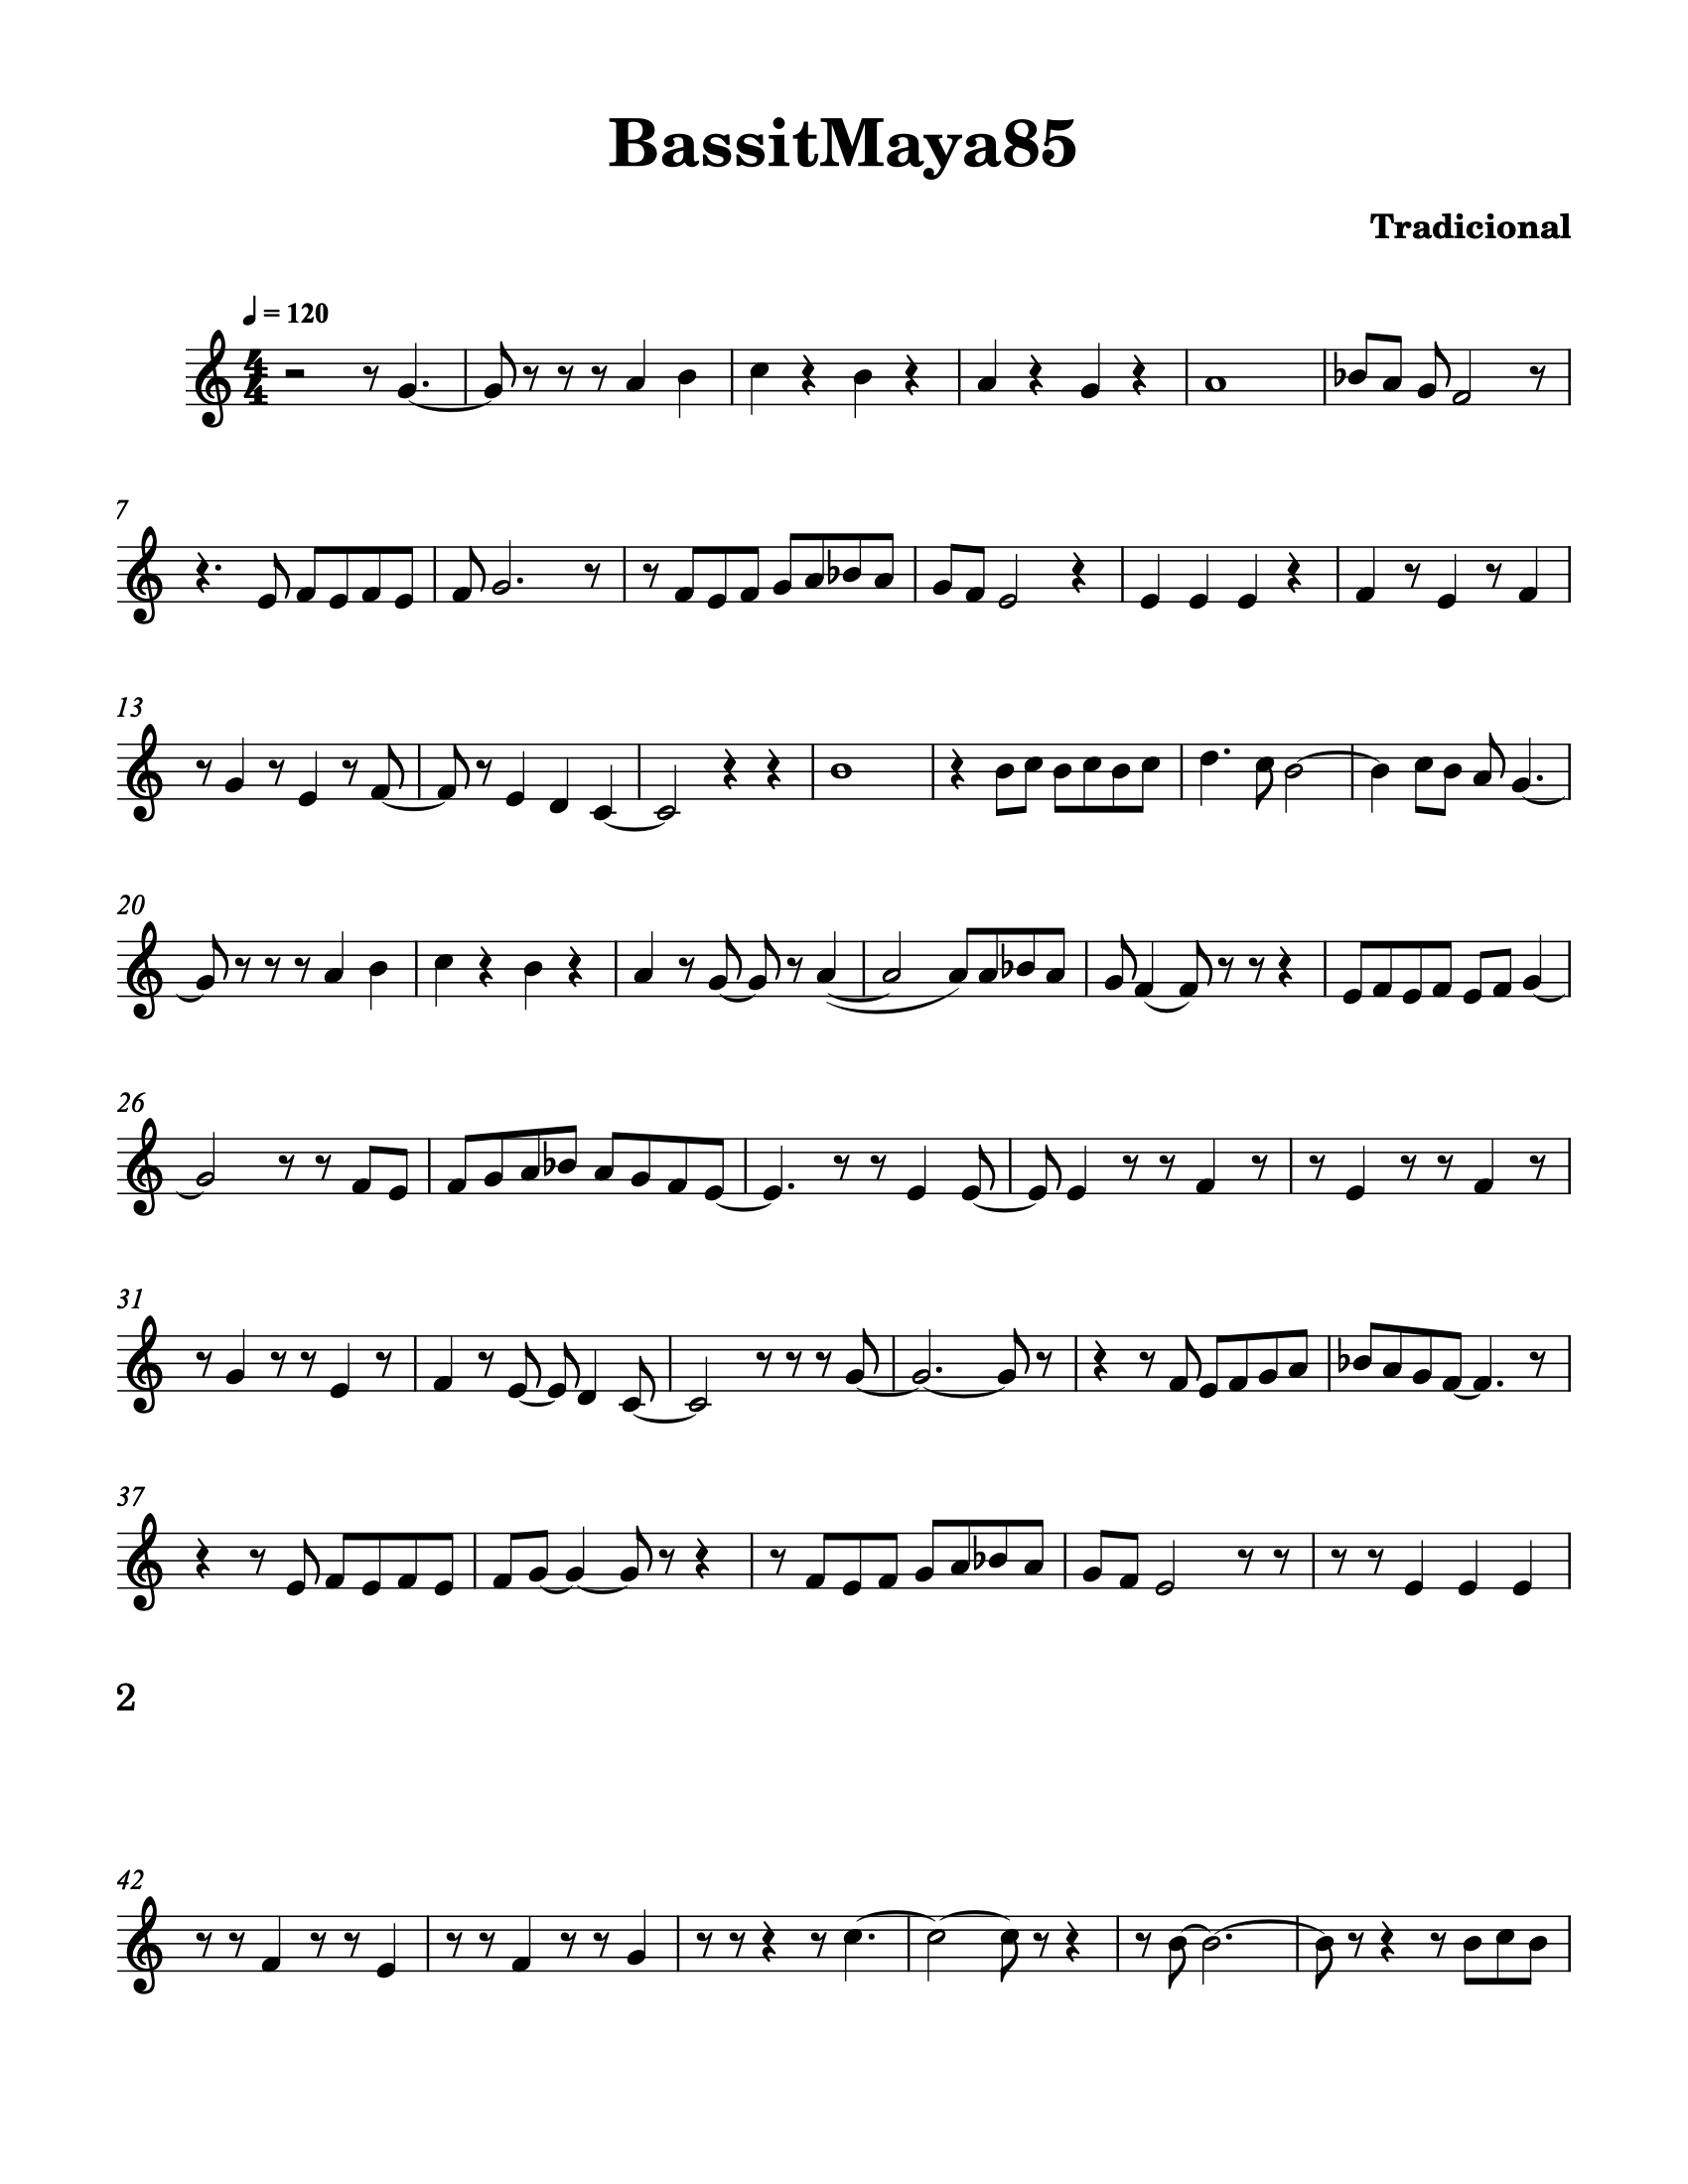

In [2]:
s = converter.parse(
    'music21-3/ArabAndalusianScores/7448d9c2-5261-4e70-bd98-6ed8416f908f.xml')
print(type(s))
s.show()


In [3]:
# print('This score contains these {} elements'.format(len(s.elements)))
# for element in s.elements:
#     print('-', element)


In [4]:
scoreParts = s.parts.stream()
for element in scoreParts.elements:
    print(element)


<music21.stream.Part Violin>


In [5]:
part = scoreParts[0]
# part0.elements
measures = part.getElementsByClass(stream.Measure).stream()
print('Measures in part 0:', len(measures))


Measures in part 0: 1168


In [6]:
measures.elements[:5]


(<music21.stream.Measure 1 offset=0.0>,
 <music21.stream.Measure 2 offset=4.0>,
 <music21.stream.Measure 3 offset=8.0>,
 <music21.stream.Measure 4 offset=12.0>,
 <music21.stream.Measure 5 offset=16.0>)

In [7]:
measure0 = measures[0]
measure0.elements


(<music21.layout.PageLayout>,
 <music21.layout.SystemLayout>,
 <music21.clef.TrebleClef>,
 <music21.tempo.MetronomeMark animato Quarter=120.0>,
 <music21.key.Key of C major>,
 <music21.meter.TimeSignature 4/4>,
 <music21.note.Rest half>,
 <music21.note.Rest eighth>,
 <music21.note.Note G>)

The first measure of a part usually contains the clef, key signature and time signature objects.
<br/>
Let's have a look to what kind of information we can obtain about the key signature and the time signature.

In [8]:
kS = measure0.getElementsByClass(key.KeySignature).stream()[0]
print('Class:', type(kS))
print('Number of altered pitches:', kS.sharps)
print('List of altered pitches:', kS.alteredPitches)
print('Measure number:', kS.measureNumber)
print('Offset:', kS.offset)


Class: <class 'music21.key.Key'>
Number of altered pitches: 0
List of altered pitches: []
Measure number: 1
Offset: 0.0


In [9]:
tS = measure0.getElementsByClass(meter.TimeSignature).stream()[0]
print('Class:', type(tS))
print('Numerator:', tS.numerator)
print('Denominator:', tS.denominator)
print('Measure number:', tS.measureNumber)
print('Offset:', tS.offset)


Class: <class 'music21.meter.base.TimeSignature'>
Numerator: 4
Denominator: 4
Measure number: 1
Offset: 0.0


In [10]:
measure3 = part.measure(3)
print('Measure number {} in offset {}'.format(
    measure3.number, measure3.offset))
print()
print('It contains the following elements:')
for element in measure3.elements:
    print(element)


Measure number 3 in offset 8.0

It contains the following elements:
<music21.note.Note C>
<music21.note.Rest quarter>
<music21.note.Note B>
<music21.note.Rest quarter>


# Note objects

Now, let's start working with note objects. They also have offsets, and we can check if they are a note or a rest.

In [11]:
measure3 = part.measure(3)
print('Measure number {} in offset {}'.format(
    measure3.number, measure3.offset))
print()
print('It contains the following elements:')
for element in measure3.elements:
    print(element)


Measure number 3 in offset 8.0

It contains the following elements:
<music21.note.Note C>
<music21.note.Rest quarter>
<music21.note.Note B>
<music21.note.Rest quarter>


In [12]:
n1 = measure3[0]
print('Class', type(n1))
print('Measure number:', n1.measureNumber)
print('Note offset:', n1.offset)
print('Is it a note?', n1.isNote)
print('Is it a rest?', n1.isRest)


Class <class 'music21.note.Note'>
Measure number: 3
Note offset: 0.0
Is it a note? True
Is it a rest? False


## note object have duration object and pitch object

In [13]:
print('Frequency:', n1.pitch.frequency)
print('Name:', n1.pitch.name)
print('Step:', n1.pitch.step)
print('Octave:', n1.pitch.octave)
print('Name with octave:', n1.pitch.nameWithOctave)
print('Midi:', n1.pitch.midi)
print('Name in Spanish:', n1.pitch.spanish)


Frequency: 523.2511306011974
Name: C
Step: C
Octave: 5
Name with octave: C5
Midi: 72
Name in Spanish: do


## different algorithms for pitch and melody detection and pattern analysis in music21


### ambitus
Ambitus.getPitchSpan(subStream) → Optional[Tuple[Pitch, Pitch]]
For a given subStream, return a tuple consisting of the two pitches with the minimum and maximum pitch space value.

code:

s = corpus.parse('bach/bwv66.6')
p = analysis.discrete.Ambitus()
pitchMin, pitchMax = p.getPitchSpan(s.parts[0].getElementsByClass(stream.Measure)[3])
pitchMin.ps, pitchMax.ps
(66.0, 71.0)
p.getPitchSpan(s.parts[0].getElementsByClass(stream.Measure)[6])

result:
(<music21.pitch.Pitch A4>, <music21.pitch.Pitch C#5>)

##  MelodicIntervalDiversity

class music21.analysis.discrete.MelodicIntervalDiversity(referenceStream=None)

"An analysis method to determine the diversity of intervals used in a Stream."

MelodicIntervalDiversity.countMelodicIntervals(sStream, found=None, ignoreDirection=True, ignoreUnison=True)¶
Find all unique melodic intervals in this Stream.

"If found is provided as a dictionary, this dictionary will be used to store Intervals, and counts of Intervals already found will be incremented."

## KeyWeightKeyAnalysis

class music21.analysis.discrete.KeyWeightKeyAnalysis(referenceStream=None)
Base class for all key-weight key analysis subclasses.


KeyWeightKeyAnalysis.getSolution(sStream)
Return a music21 Key object defining the results of the analysis. Do not call process before calling this method, as this method calls process.


s = corpus.parse('bach/bwv66.6')
p = analysis.discrete.KrumhanslSchmuckler()
p.getSolution(s)  # this seems correct
<music21.key.Key of f# minor>
>>>
s = corpus.parse('bach/bwv57.8')
p = analysis.discrete.KrumhanslSchmuckler(s)
p.getSolution(s)

result:
<music21.key.Key of B- major>

Sure, I can help you with that. Here's some sample code using the music21 library in Python to find melodic similarities between two pieces of music:
from music21 import *

# Load two pieces of music
piece1 = converter.parse('path/to/first/piece.xml')
piece2 = converter.parse('path/to/second/piece.xml')

# Extract the melody line from each piece
melody1 = piece1.parts[0].melodicLine
melody2 = piece2.parts[0].melodicLine

# Calculate the similarity between the two melodies
similarity = melody1.similarity(melody2)
print(f"Melodic similarity between the two pieces: {similarity}")

Note that this assumes that the pieces are in MusicXML format and have their melody lines in the first part. You may need to adjust the code slightly depending on your specific needs.

In [14]:
p = analysis.discrete.Ambitus()
pitchMin, pitchMax = p.getPitchSpan(
    s.parts[0].getElementsByClass(stream.Measure)[3])


In [15]:
part = scoreParts[0]
measures = part.getElementsByClass(stream.Measure).stream()
limited_measures = part.measures(1, 100)
print('Measures in part 0:', len(measures))


Measures in part 0: 1168


In [16]:

pitch_span_dict = {}
pitch_span_count = 0
no_pitch_span_count = 0

for i in range(len(measures)):
    pitch_span_measure_index = f"measure[{i}]"

    measure = s.parts[0].getElementsByClass(stream.Measure)[i]

    # pitch_span_value returns class object with min and max values like: (<music21.pitch.Pitch G4>, <music21.pitch.Pitch G4>)
    pitch_span_value = p.getPitchSpan(measure)

    if pitch_span_value is not None:
        pitchMin, pitchMax = p.getPitchSpan(
            s.parts[0].getElementsByClass(stream.Measure)[i])
        minimum_note = pitchMin.nameWithOctave
        maximum_note = pitchMax.nameWithOctave
        aInterval = music21.interval.Interval(
            pitchStart=pitchMin, pitchEnd=pitchMax)
        aInterval_simple_name = aInterval.simpleName
        pitch_span_dict[pitch_span_measure_index] = (
            pitchMin, pitchMax, minimum_note, maximum_note, aInterval, aInterval_simple_name)
        pitch_span_count += 1
    else:
        no_pitch_span_count += 1


print(f"found pitch span in  {pitch_span_count} measures")
print(f"found no pitch span in  {no_pitch_span_count} measures")


found pitch span in  1152 measures
found no pitch span in  16 measures


In [17]:
print("pitch_span", pitch_span_dict["measure[1]"])


pitch_span (<music21.pitch.Pitch G4>, <music21.pitch.Pitch B4>, 'G4', 'B4', <music21.interval.Interval M3>, 'M3')


[<music21.pitch.Pitch G4>, <music21.pitch.Pitch G4>]
[<music21.pitch.Pitch G4>, <music21.pitch.Pitch B4>]
[<music21.pitch.Pitch B4>, <music21.pitch.Pitch C5>]
[<music21.pitch.Pitch G4>, <music21.pitch.Pitch A4>]
[<music21.pitch.Pitch A4>, <music21.pitch.Pitch A4>]
[<music21.pitch.Pitch F4>, <music21.pitch.Pitch B-4>]
[<music21.pitch.Pitch E4>, <music21.pitch.Pitch F4>]
[<music21.pitch.Pitch F4>, <music21.pitch.Pitch G4>]
[<music21.pitch.Pitch E4>, <music21.pitch.Pitch B-4>]
[<music21.pitch.Pitch E4>, <music21.pitch.Pitch G4>]


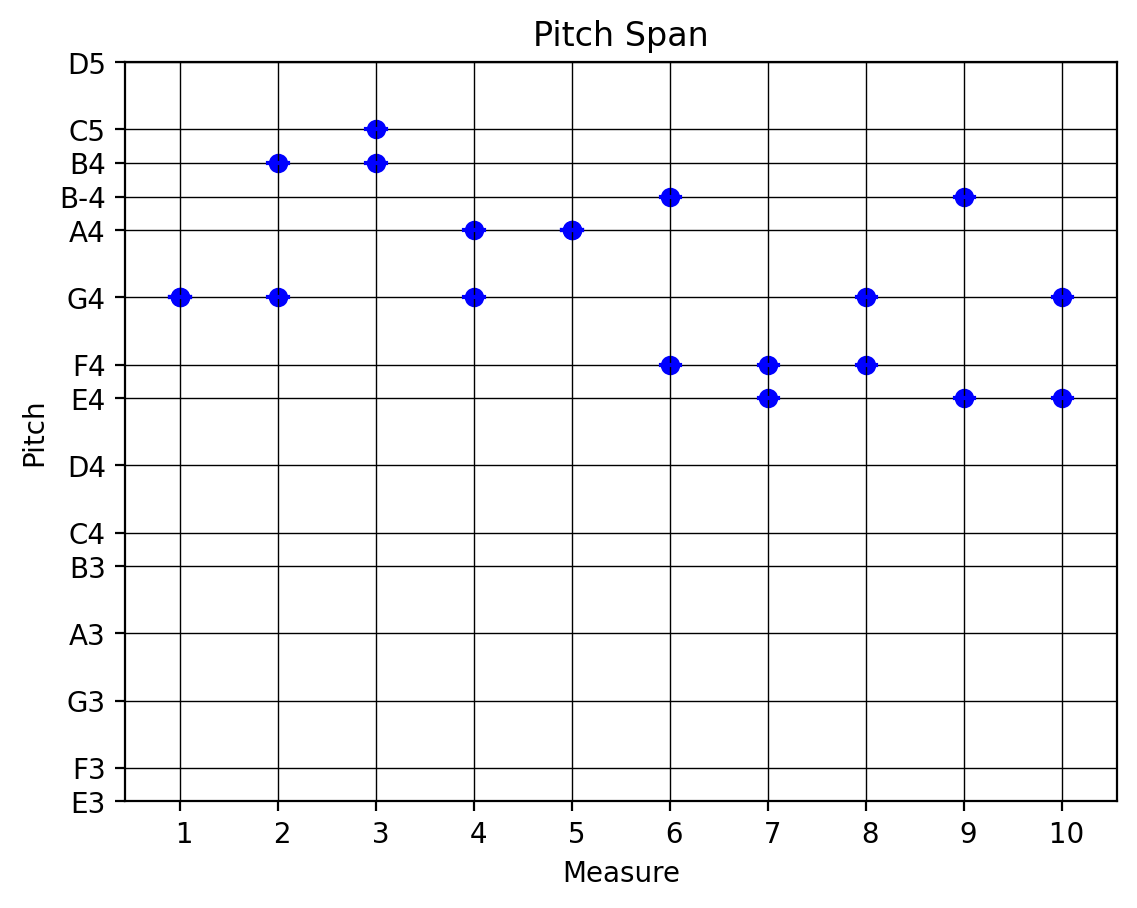

<Figure size 1000x600 with 0 Axes>

In [18]:
import music21 as m21
import matplotlib.pyplot as plt

# Get the pitches for each measure
measure_pitches = []
for measure_index in pitch_span_dict:
    pitches = pitch_span_dict[measure_index]
    pitches = pitches[2:4]
    pitches = [m21.pitch.Pitch(p) for p in pitches]  # convert to Pitch objects
    measure_pitches.append(pitches)

# Create a scatter plot
fig, ax = plt.subplots()
for i in range(10):
    x = i
    print(measure_pitches[i])
    y_min = measure_pitches[i][0].ps
    y_max = measure_pitches[i][1].ps
    ax.scatter([x, x], [y_min, y_max], c='b')
    ax.plot([x-0.1, x+0.1], [y_min, y_min], c='b')
    ax.plot([x-0.1, x+0.1], [y_max, y_max], c='b')

# Set the x-axis labels to the measure numbers
ax.set_xticks(range(10))
ax.set_xticklabels([f" {i}" for i in range(1, 10+1)])

# Set the y-axis labels to the pitch names
pitch_names = sorted(
    set([pitch.nameWithOctave for pitch_tuple in measure_pitches for pitch in pitch_tuple]))
ax.set_yticks([m21.pitch.Pitch(p).ps for p in pitch_names])
ax.set_yticklabels(pitch_names)

# Set the plot title and axis labels
ax.set_title("Pitch Span")
ax.set_xlabel("Measure")
ax.set_ylabel("Pitch")

# Show the plot
plt.grid(color='black', linestyle='-', linewidth=0.5, zorder=2.5)
plt.figure(figsize=(10, 6))
plt.show()


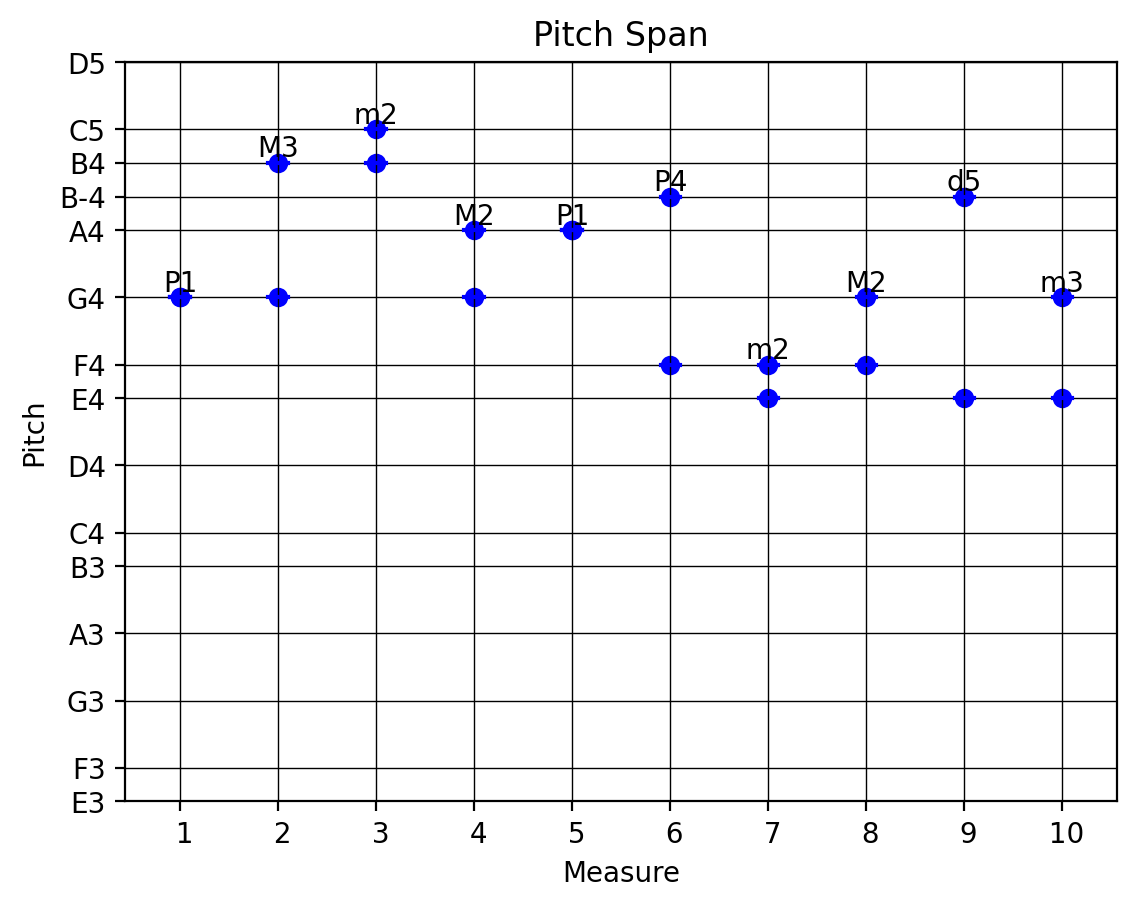

<Figure size 1000x600 with 0 Axes>

In [19]:
# Get the pitches for each measure
measure_pitches = []
measure_intervals = []
for measure_index in pitch_span_dict:
    pitches = pitch_span_dict[measure_index]
    pitches = pitches[2:4]
    pitches = [m21.pitch.Pitch(p) for p in pitches]  # convert to Pitch objects
    measure_pitches.append(pitches)
    # get interval as string
    measure_intervals.append(str(pitch_span_dict[measure_index][5]))

# Create a scatter plot
fig, ax = plt.subplots()
for i in range(10):
    x = i
    y_min = measure_pitches[i][0].ps
    y_max = measure_pitches[i][1].ps
    ax.scatter([x, x], [y_min, y_max], c='b')
    ax.plot([x-0.1, x+0.1], [y_min, y_min], c='b')
    ax.plot([x-0.1, x+0.1], [y_max, y_max], c='b')
    # add interval as text to plot
    ax.text(x, y_max, measure_intervals[i], ha='center', va='bottom')

# Set the x-axis labels to the measure numbers
ax.set_xticks(range(10))
ax.set_xticklabels([f" {i}" for i in range(1, 10+1)])

# Set the y-axis labels to the pitch names
pitch_names = sorted(
    set([pitch.nameWithOctave for pitch_tuple in measure_pitches for pitch in pitch_tuple]))
ax.set_yticks([m21.pitch.Pitch(p).ps for p in pitch_names])
ax.set_yticklabels(pitch_names)

# Set the plot title and axis labels
ax.set_title("Pitch Span")
ax.set_xlabel("Measure")
ax.set_ylabel("Pitch")

# Show the plot
plt.grid(color='black', linestyle='-', linewidth=0.5, zorder=2.5)
plt.figure(figsize=(10, 6))
plt.show()


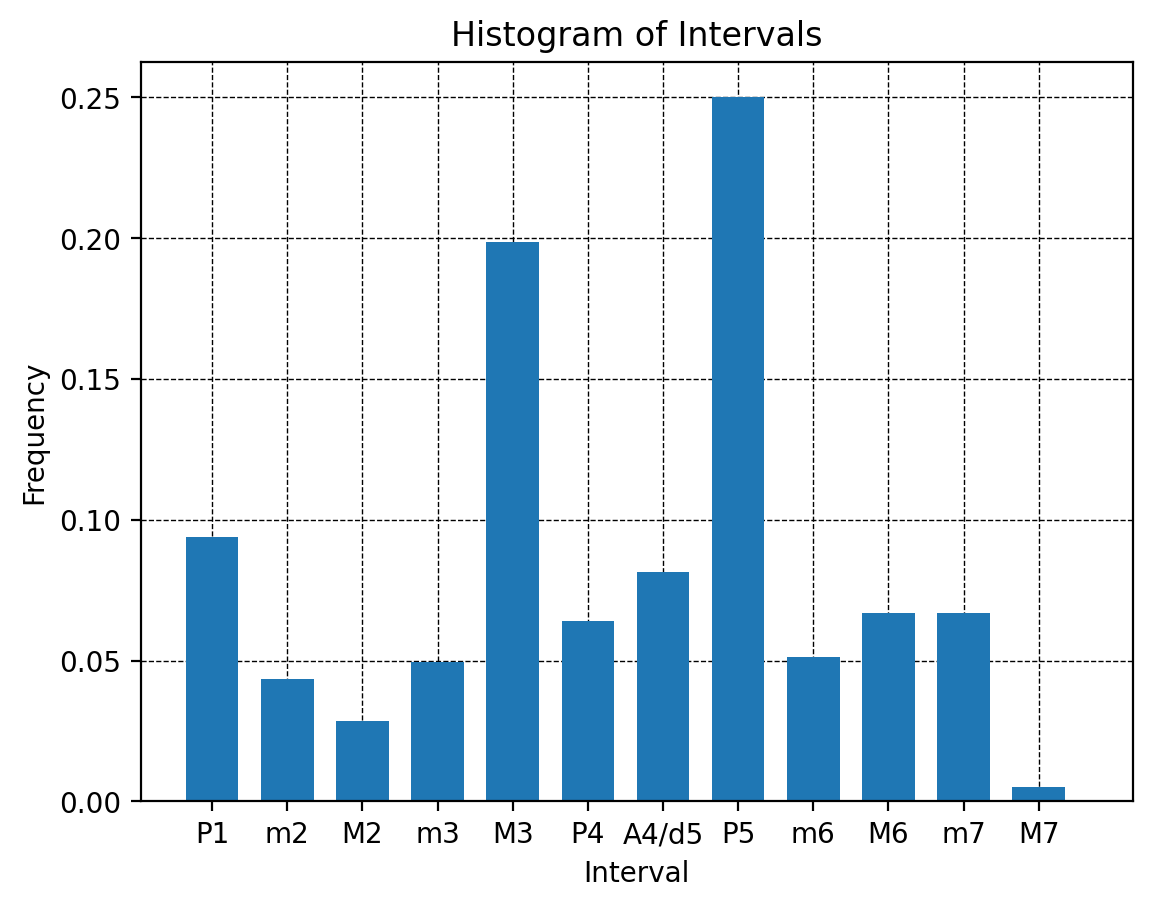

In [20]:
import matplotlib.pyplot as plt

# create a list to store interval names for each measure
measure_intervals = []
for measure in pitch_span_dict.values():
    interval_name = measure[5]
    measure_intervals.append(interval_name)

bin_edges = range(13)
bin_width = 0.7

# create a histogram of the intervals
plt.hist(measure_intervals, bins=[
         edge - bin_width/2 for edge in bin_edges], density=True, width=bin_width, zorder = 2.5)
plt.xticks(range(12), ('P1', 'm2', 'M2', 'm3', 'M3',
           'P4', 'A4/d5', 'P5', 'm6', 'M6', 'm7', 'M7'))
plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.title('Histogram of Intervals')
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()


In [21]:
print(measure_intervals)
print(set(measure_intervals))


['P1', 'M3', 'm2', 'M2', 'P1', 'P4', 'm2', 'M2', 'd5', 'm3', 'P1', 'm2', 'm3', 'P4', 'P1', 'P1', 'm2', 'm3', 'P4', 'M3', 'm2', 'M2', 'm2', 'M2', 'm3', 'm3', 'd5', 'P1', 'm2', 'm2', 'm3', 'P4', 'P5', 'P1', 'P4', 'P4', 'm2', 'M2', 'd5', 'm3', 'P1', 'm2', 'M2', 'P1', 'P1', 'P1', 'm2', 'm3', 'm2', 'P4', 'm3', 'm3', 'M2', 'm2', 'M3', 'm2', 'P1', 'd5', 'm3', 'P1', 'm2', 'm3', 'm2', 'M2', 'P1', 'P1', 'P1', 'm3', 'P1', 'P1', 'M3', 'P1', 'P1', 'P1', 'P1', 'M2', 'P1', 'P1', 'P1', 'm3', 'P1', 'P1', 'M3', 'P1', 'm2', 'M2', 'm2', 'M2', 'P1', 'm2', 'M2', 'P1', 'P1', 'P1', 'm3', 'P1', 'P1', 'M3', 'P1', 'P1', 'P1', 'P1', 'M2', 'P1', 'P1', 'P1', 'm3', 'P1', 'P1', 'M3', 'P1', 'm2', 'M2', 'm2', 'M2', 'P1', 'm2', 'M2', 'P1', 'P1', 'P1', 'm3', 'P1', 'P1', 'M3', 'P1', 'P1', 'M2', 'P1', 'P1', 'M2', 'P1', 'P1', 'M2', 'P1', 'M2', 'P1', 'm2', 'M2', 'P1', 'P1', 'P1', 'P1', 'P1', 'M2', 'P1', 'M2', 'P1', 'm2', 'M2', 'P1', 'M2', 'M2', 'P1', 'P1', 'P1', 'm3', 'P1', 'P1', 'M3', 'P1', 'P1', 'M2', 'P1', 'P1', 'M2', 'P1

In [22]:
# s_key = corpus.parse(
#     'music21-3/ArabAndalusianScores/8842c1f0-e261-4069-bd59-768bb9a3315c.xml')
k = analysis.discrete.KrumhanslSchmuckler()
k.getSolution(s)  # this seems correct



<music21.key.Key of C major>

In [23]:
# # Load two pieces of music
# s1 = converter.parse(
#     'music21-3/ArabAndalusianScores/7448d9c2-5261-4e70-bd98-6ed8416f908f.xml')
# s2 = converter.parse(
#     'music21-3/ArabAndalusianScores/8842c1f0-e261-4069-bd59-768bb9a3315c.xml')

# # Get the melodic interval distributions for each score
# mic1 = analysis.discrete.MelodicIntervalDiversity().process(
#     s1.flat.notesAndRests,  True)
# mic2 = analysis.discrete.MelodicIntervalDiversity().process(
#     s2.flat.notesAndRests,  True)

# # Calculate the difference between the two melodic interval distributions
# mic_difference = abs(mic1[0] - mic2[0])

# # Print the difference
# print(f"The melodic interval distribution difference is {mic_difference}")


In [24]:
# from music21 import converter, features

# # Load the two scores you want to compare
# s1 = converter.parse(
#     'music21-3/ArabAndalusianScores/7448d9c2-5261-4e70-bd98-6ed8416f908f.xml')
# s2 = converter.parse(
#     'music21-3/ArabAndalusianScores/8842c1f0-e261-4069-bd59-768bb9a3315c.xml')

# # Create a list of feature extractors and add the features you want to use
# feList = [features.PitchClassDistribution(),
#           features.NoteValueDistribution(),
#           features.RhythmHierarchy()]

# # Create a feature extractor and add the features to it
# fe = features.base.ComplexityFeatureExtractor(featureList=feList)

# # Extract the features for each score
# features1 = fe.extract(s1)
# features2 = fe.extract(s2)

# # Compare the two sets of features
# similarity = features1.correlation(features2)

# print(similarity)


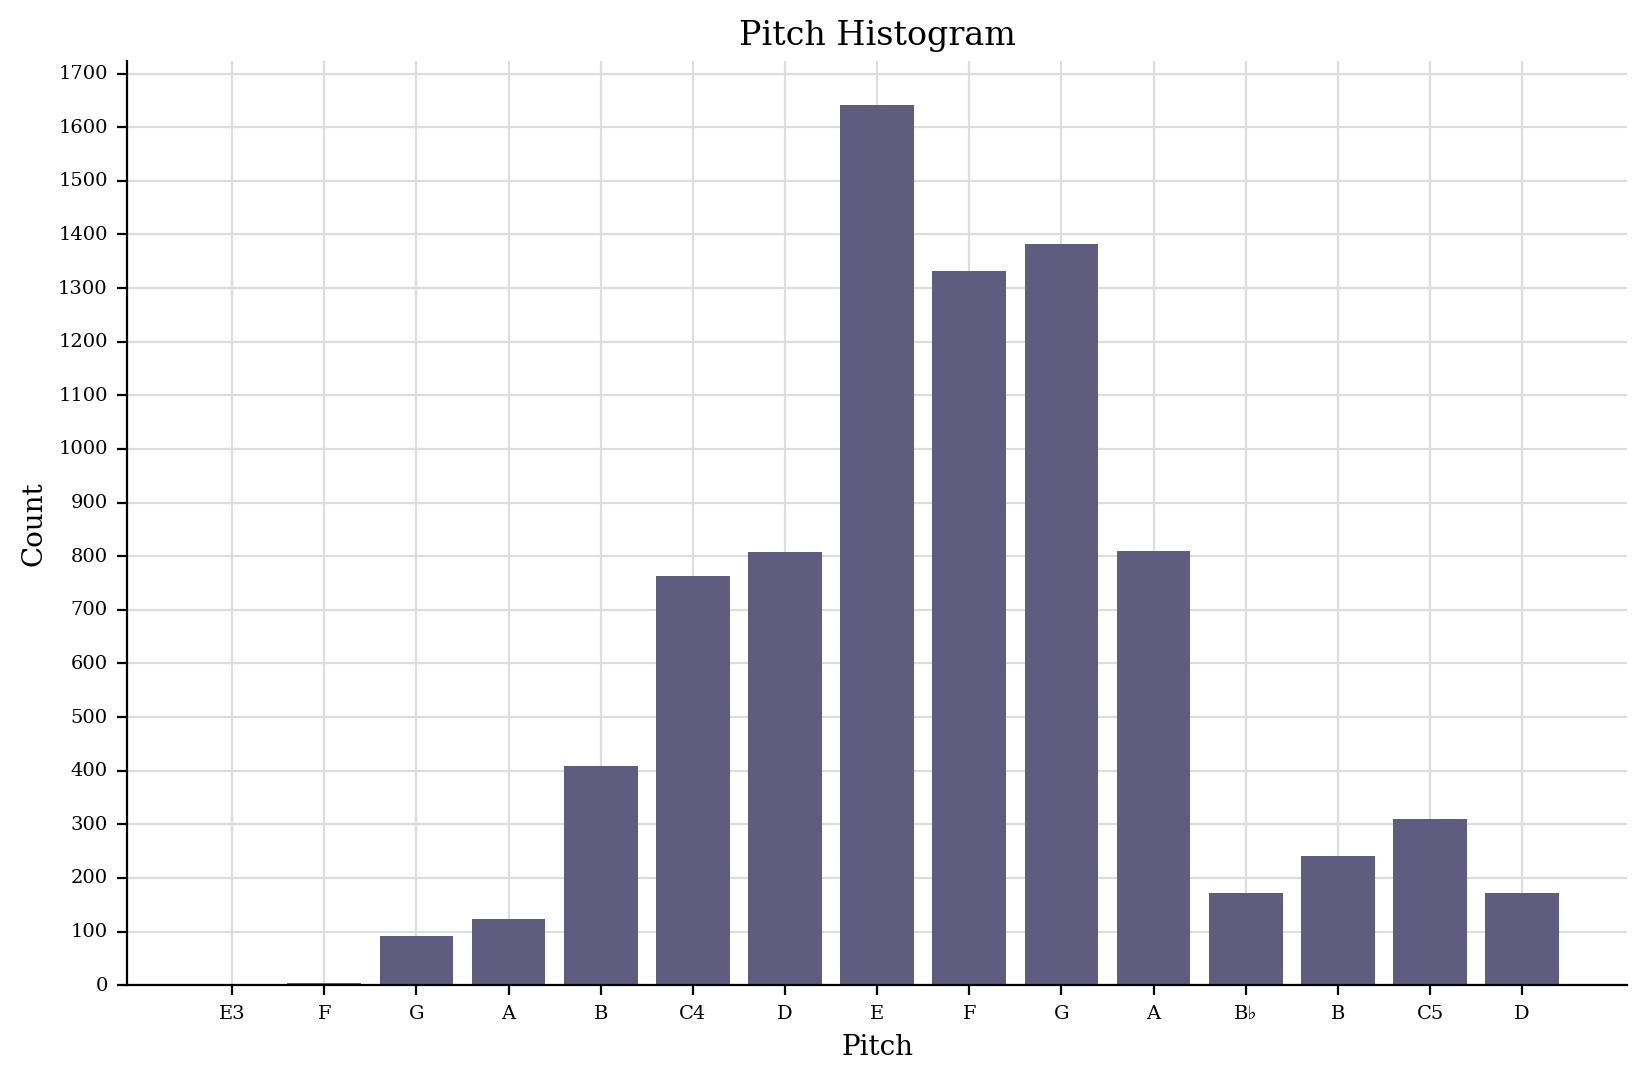

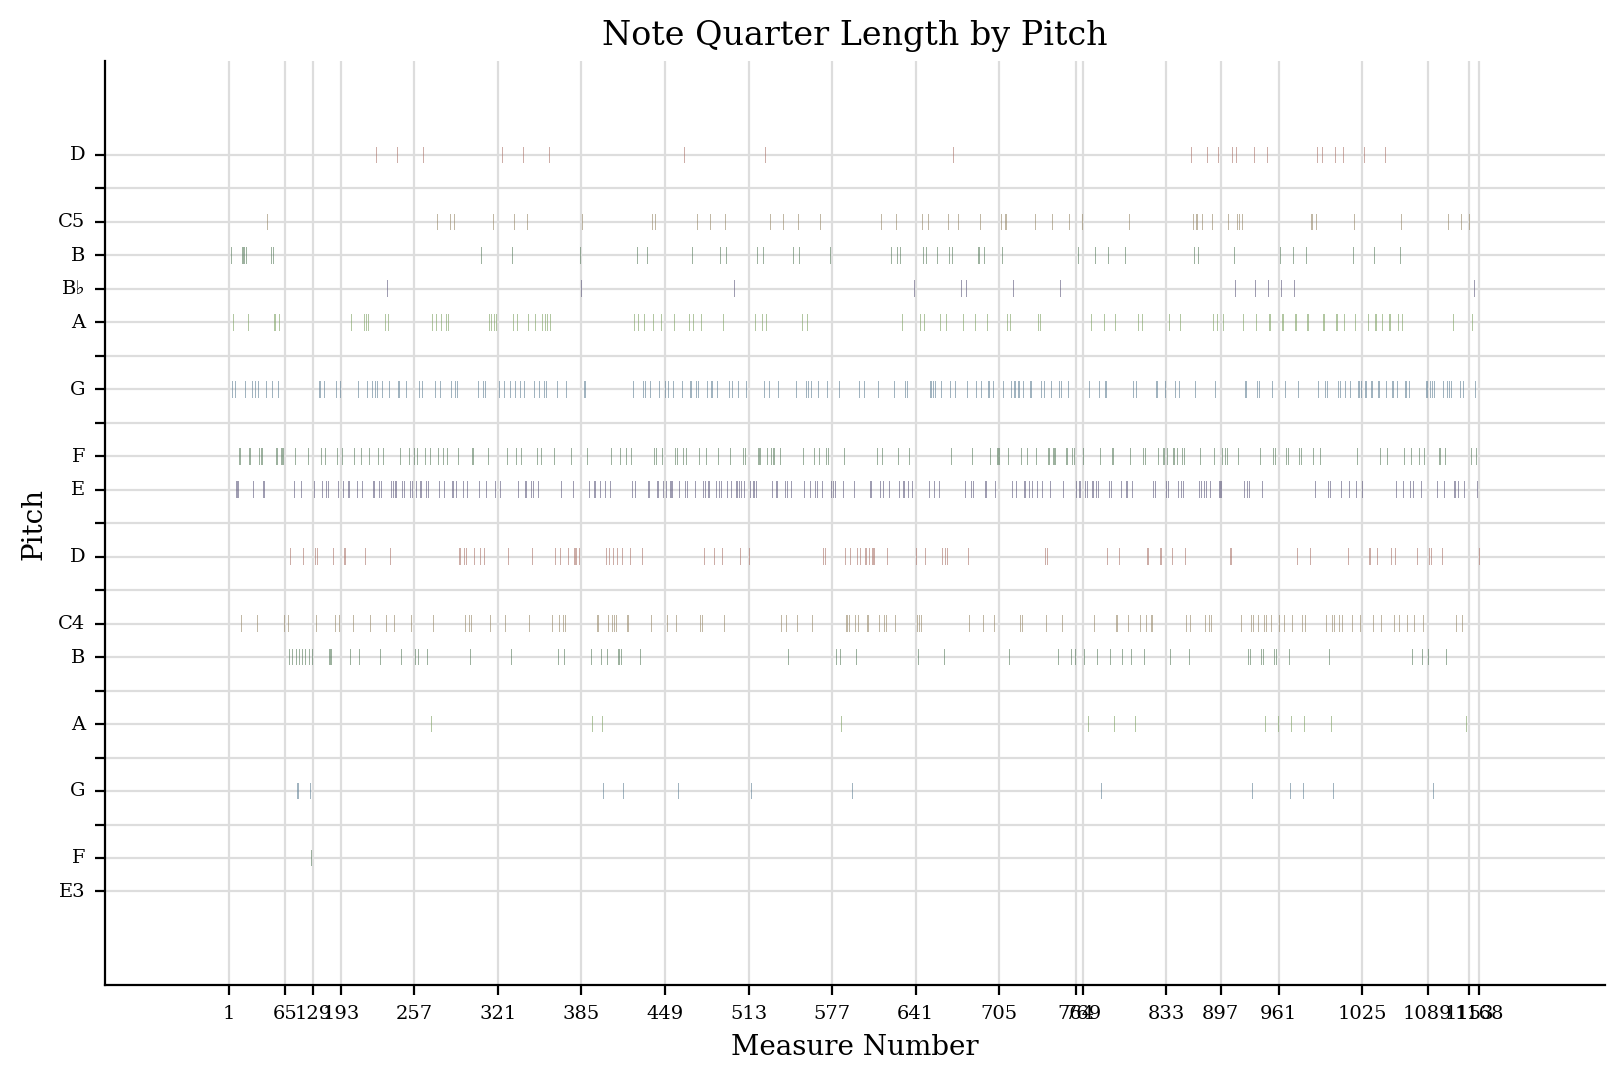

In [25]:
plot_pitch = s.plot('histogram', 'pitch')
plot_pianoroll = s.plot('pianoroll')


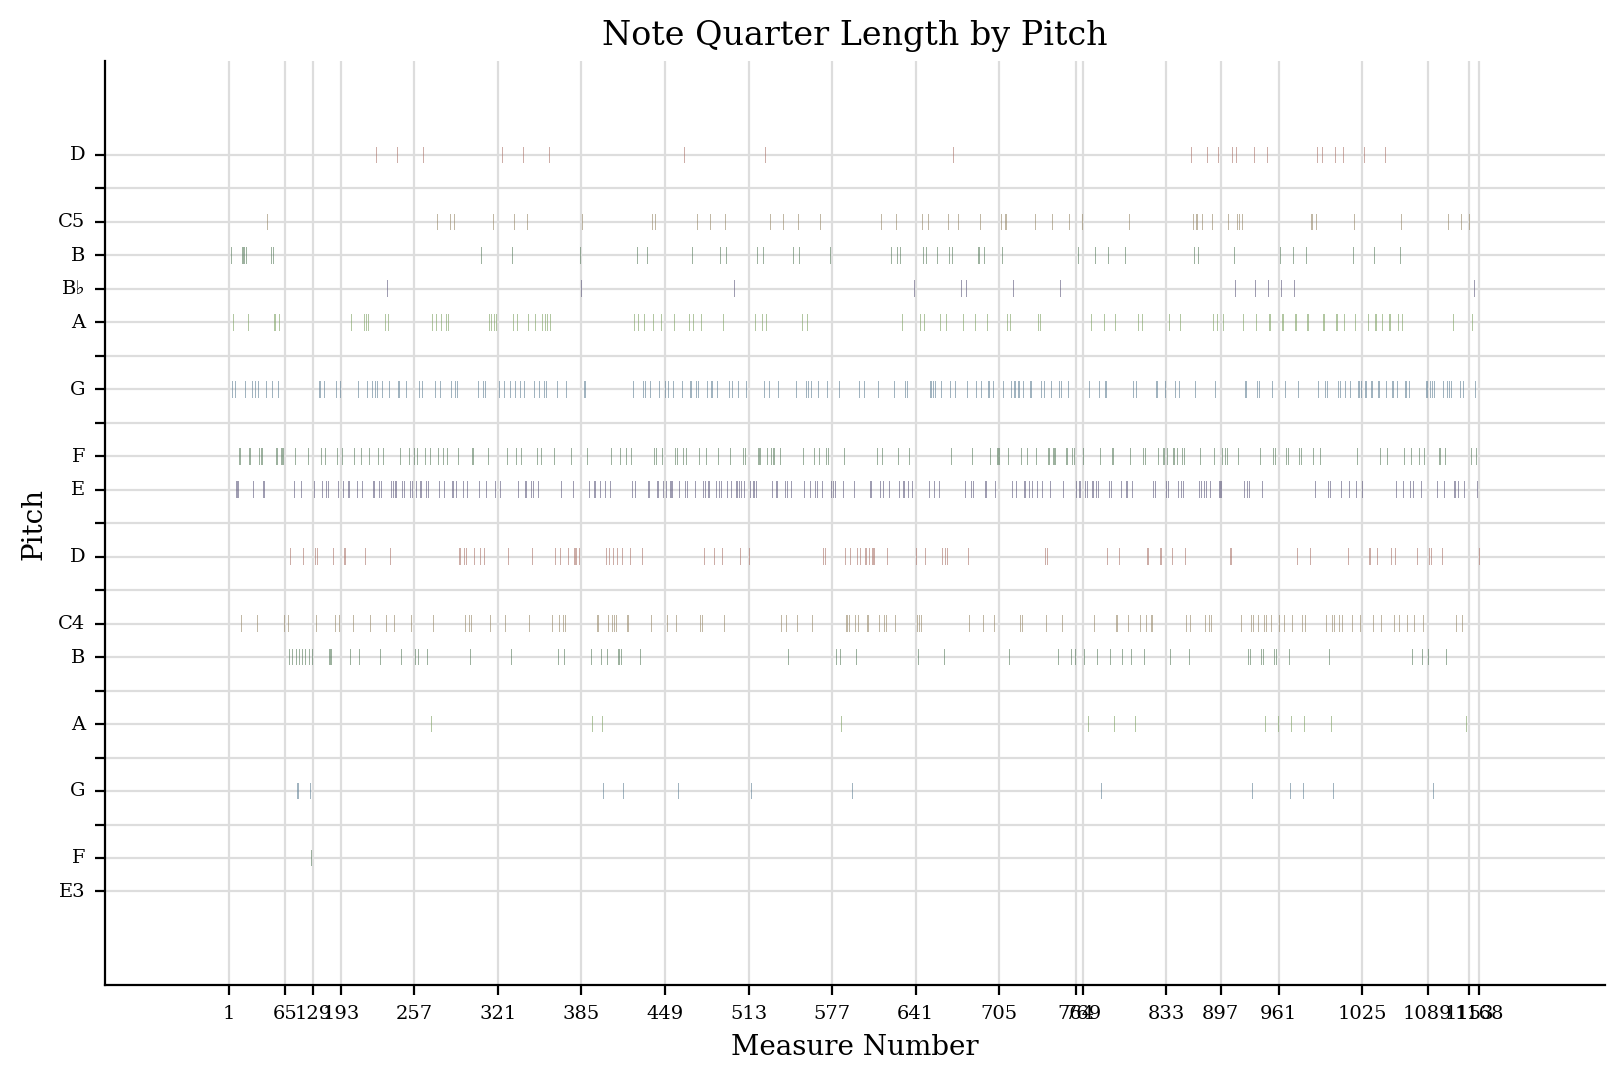

In [26]:


short_plot_pianoroll = s.plot('pianoroll')


In [30]:
s1 = converter.parse(
    'Btayhi_Isbahan.mxl')

s2 = converter.parse(
    'Btayhi_Istihlal.mxl')

s3 = converter.parse(
    'Btayhi_Maya.mxl')

s4 = converter.parse(
    'Btayhi_Raml_Maya.mxl')

s5 = converter.parse(
    'Btayhi_Rasd_Dayl.mxl')






pianoroll_Btayhi_Isbahan


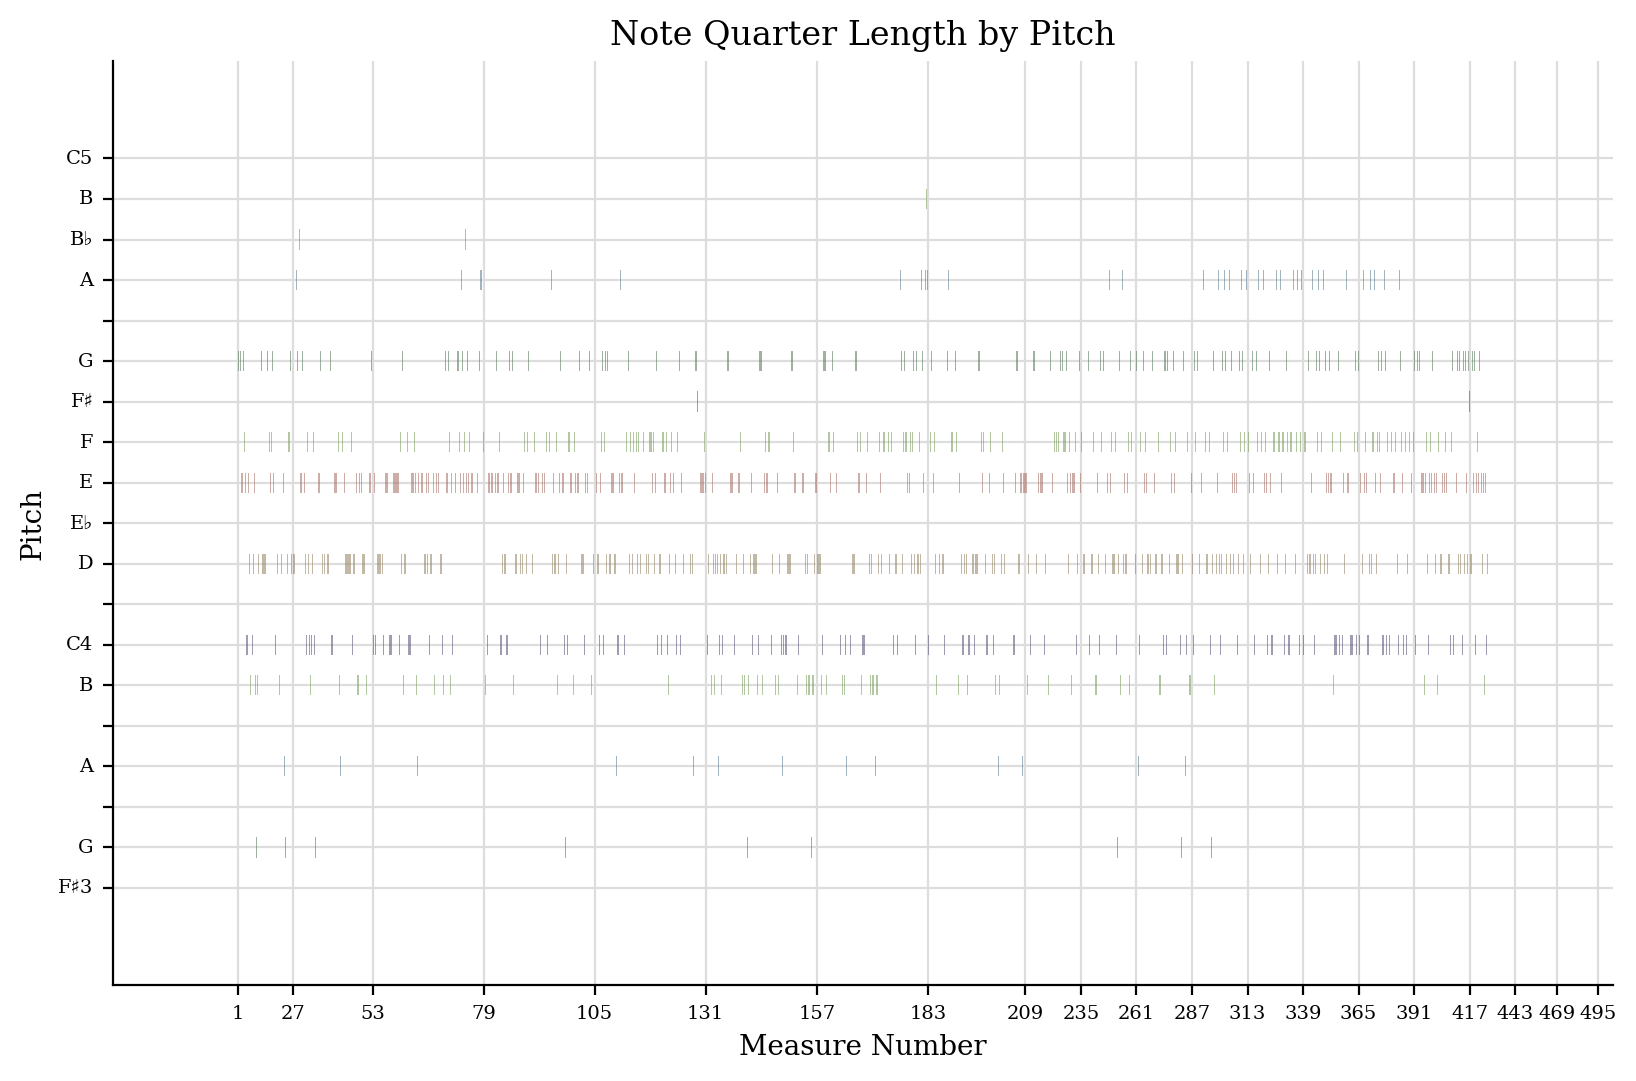

In [33]:

print("pianoroll_Btayhi_Isbahan")
pianoroll_Btayhi_Isbahan = s1.plot('pianoroll')


pianoroll_Btayhi_Istihlal


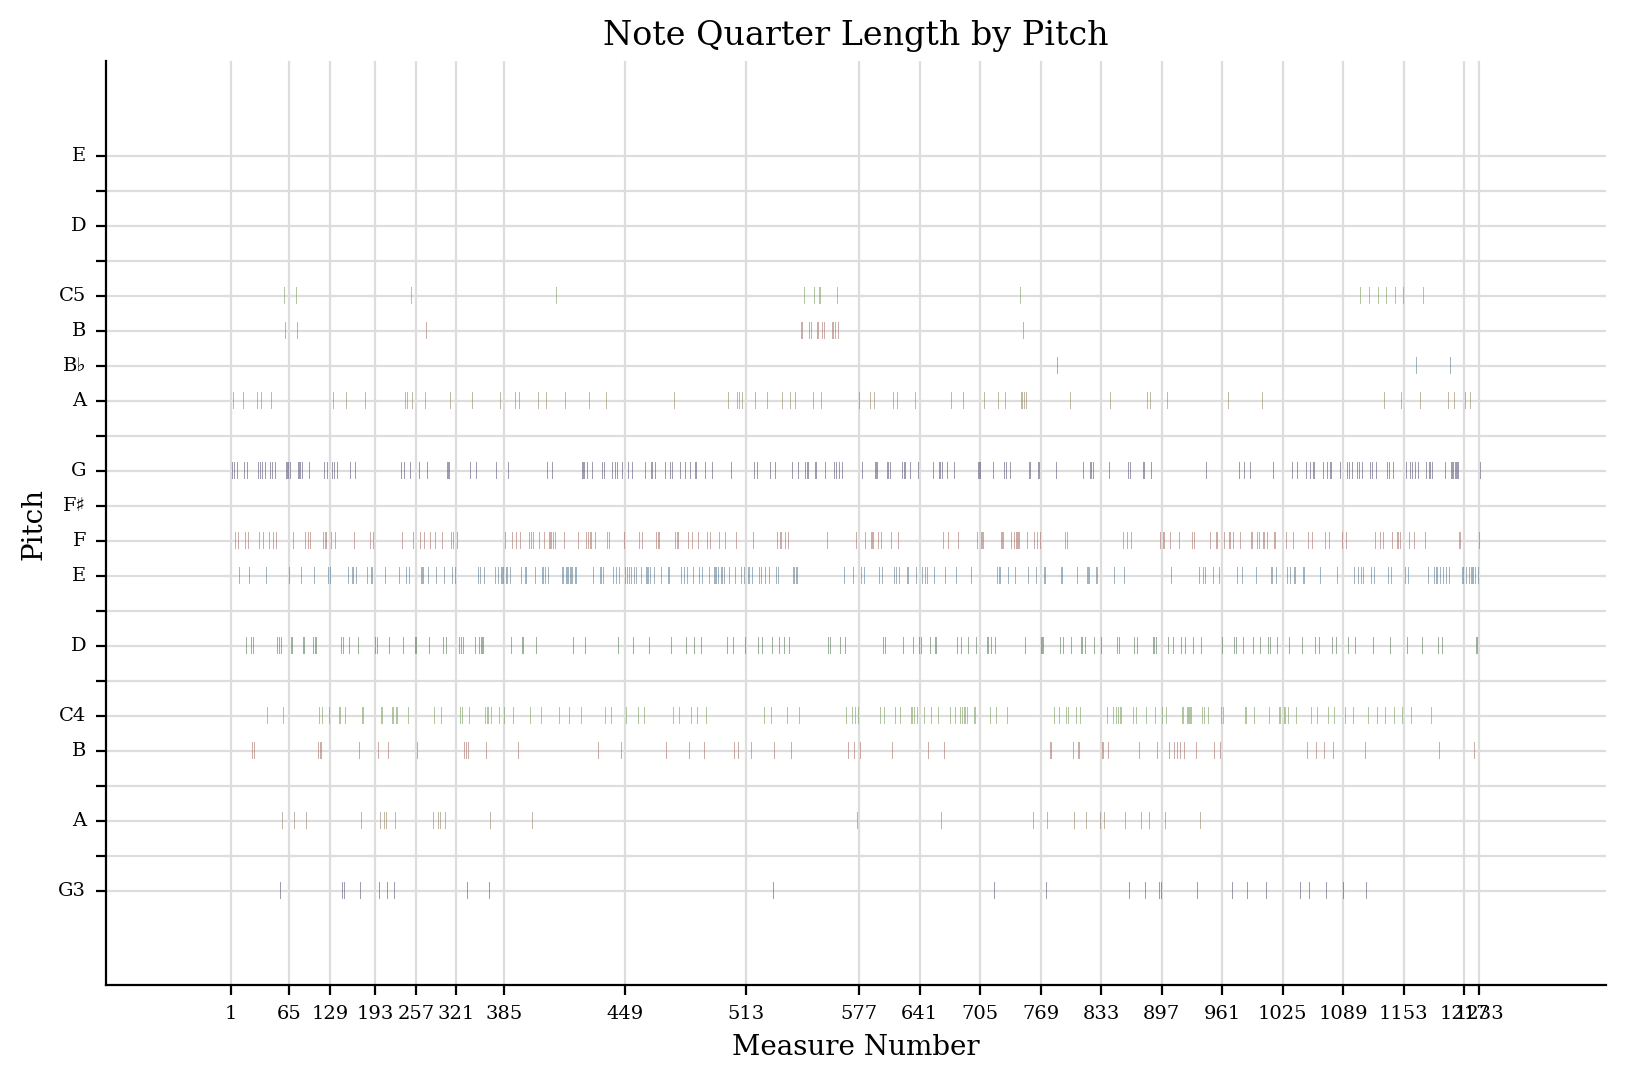

In [34]:
print("pianoroll_Btayhi_Istihlal")
pianoroll_Btayhi_Istihlal = s2.plot('pianoroll')



pianoroll_Btayhi_Maya


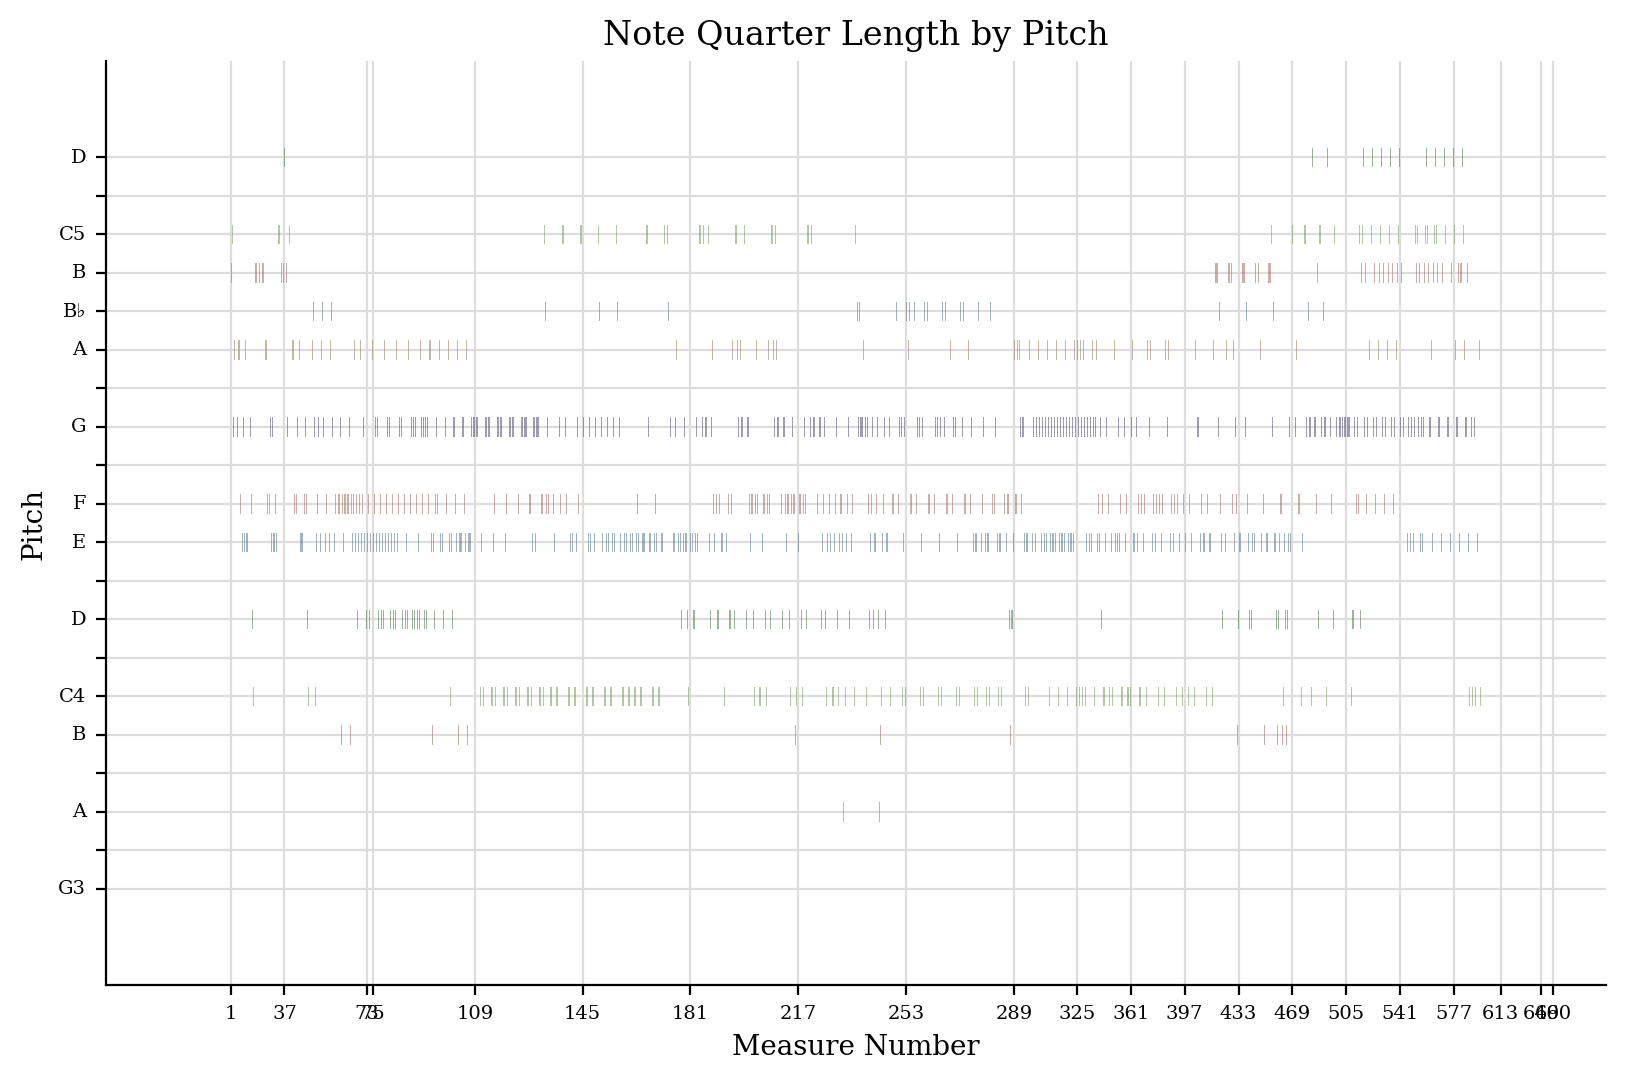

In [35]:

print("pianoroll_Btayhi_Maya")
pianoroll_Btayhi_Maya = s3.plot('pianoroll')




pianoroll_Raml_Maya


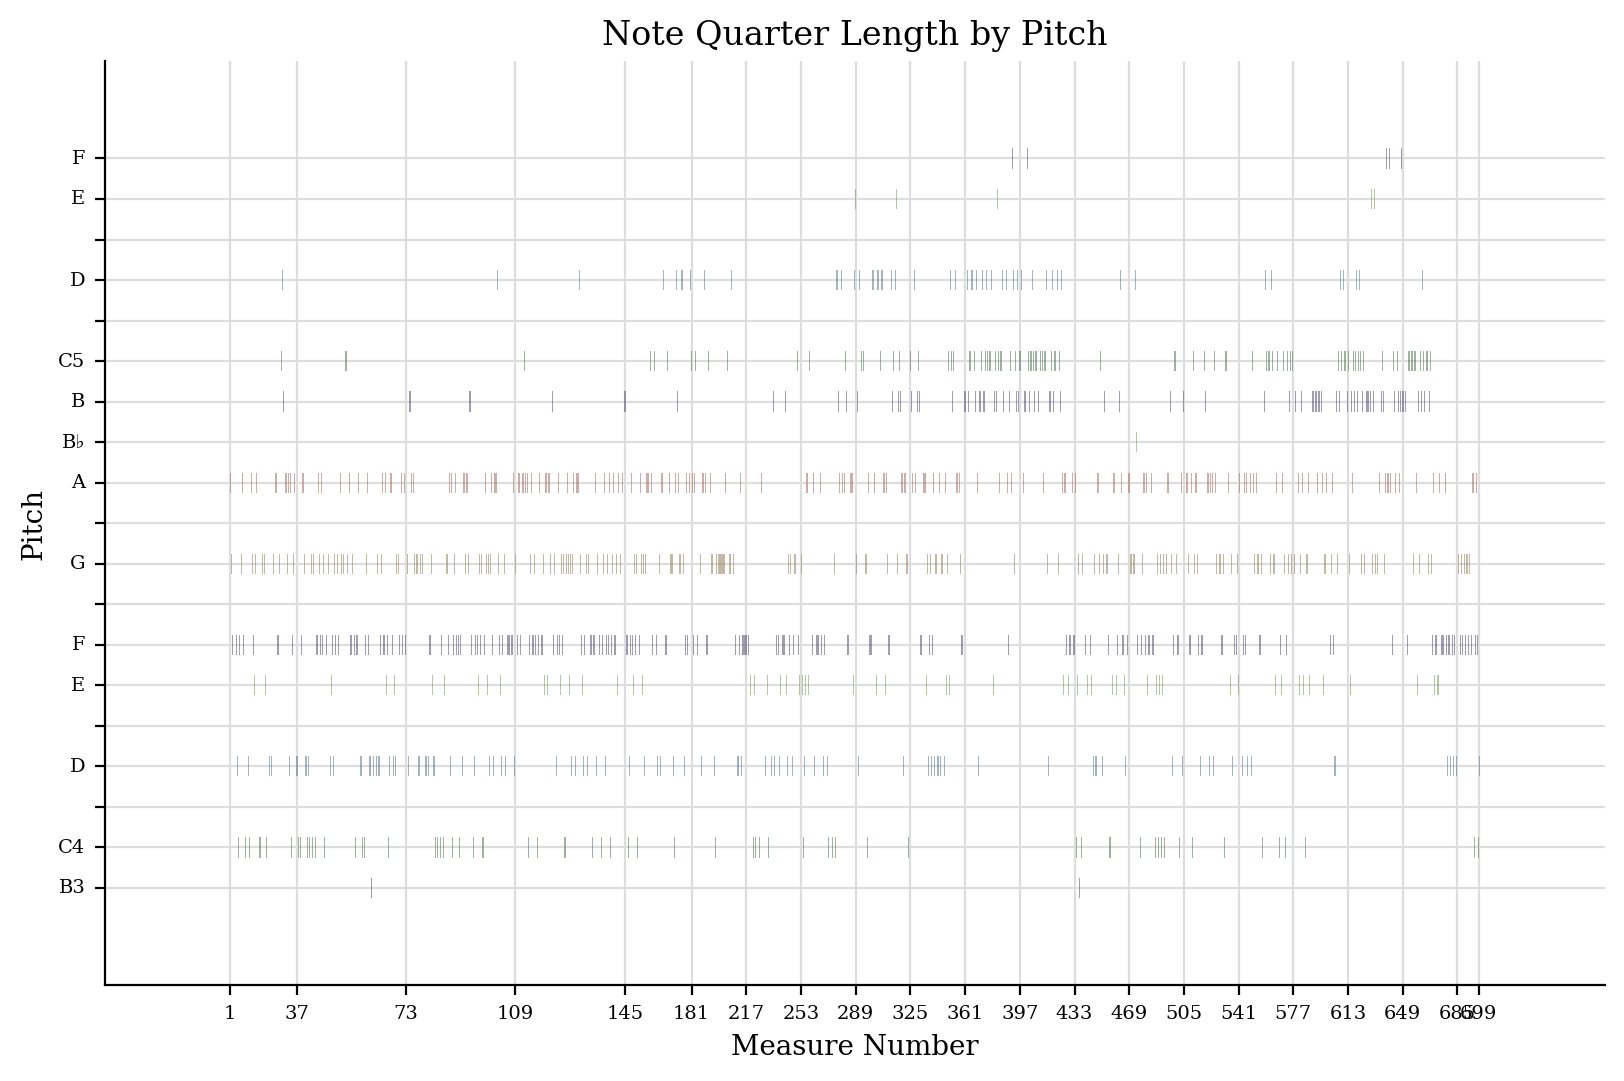

In [37]:
print("pianoroll_Raml_Maya")
pianoroll_Raml_Maya = s4.plot('pianoroll')



pianoroll_Rasd_Dayl


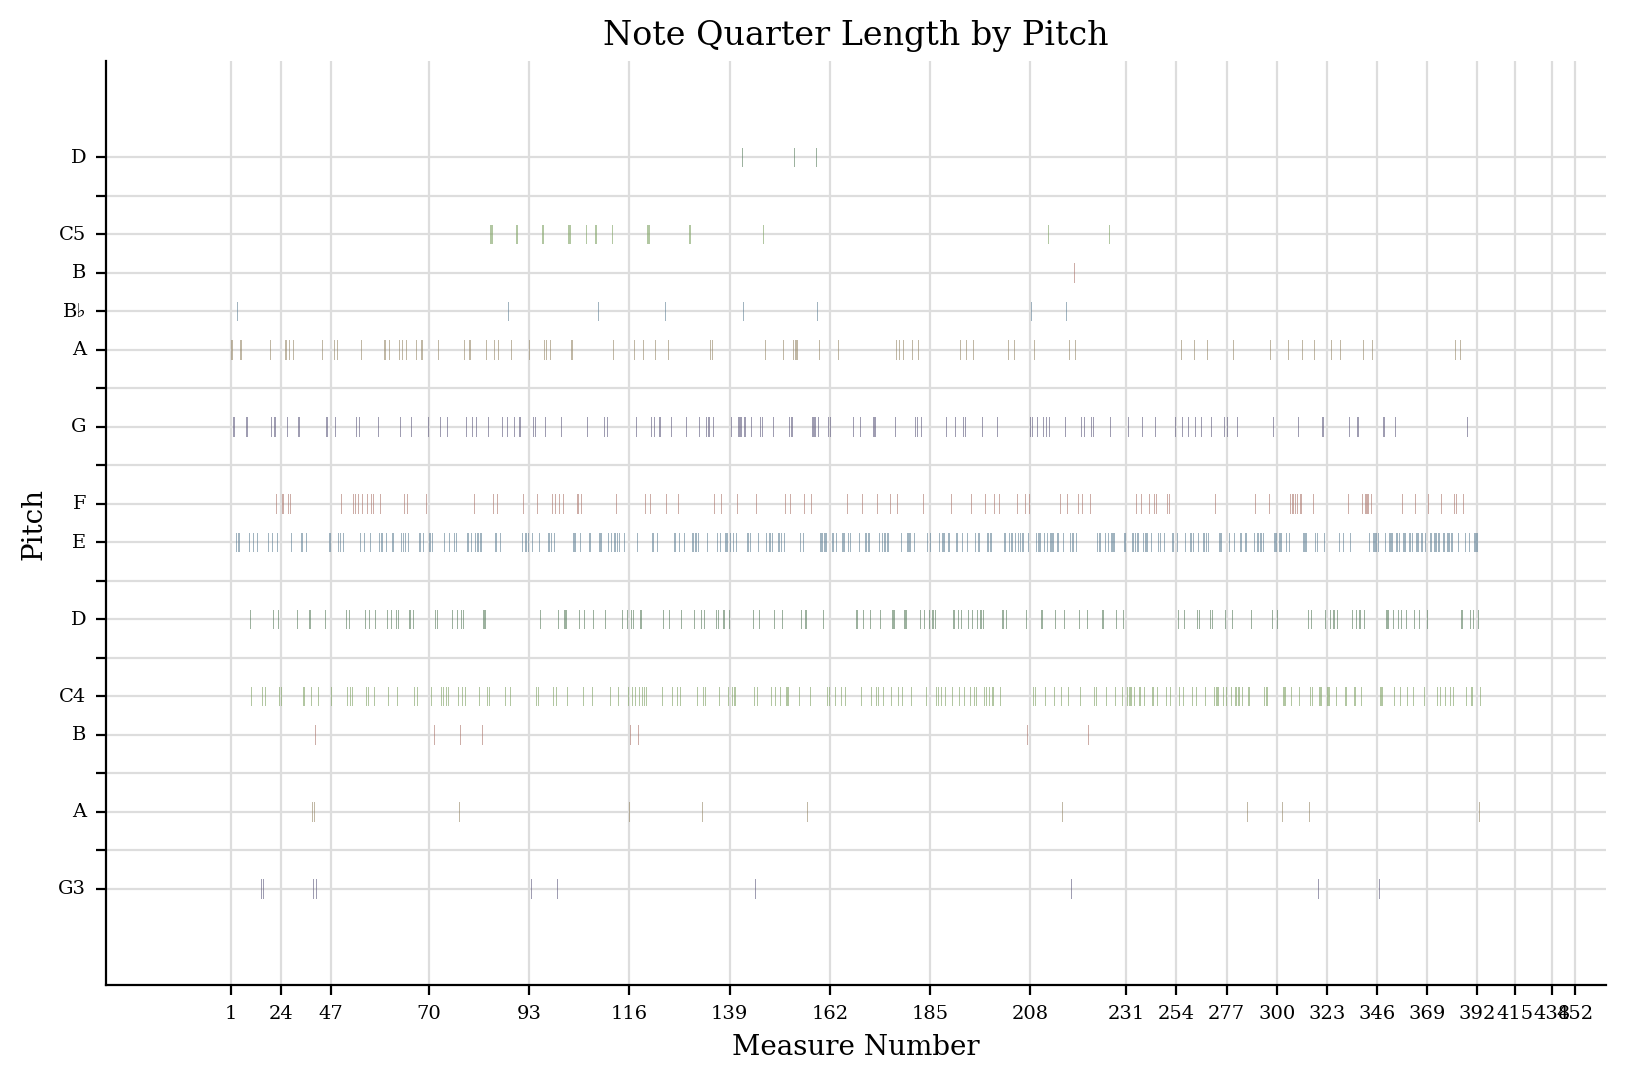

In [36]:

print("pianoroll_Rasd_Dayl")
pianoroll_Rasd_Dayl = s5.plot('pianoroll')
